In [28]:
%load_ext autoreload
%autoreload 2
%config Completer.use_jedi = False

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [29]:
from pathlib import Path

from wikipedia_cleanup.data_filter import KeepAttributesDataFilter, generate_default_filters
from wikipedia_cleanup.predict import TrainAndPredictFramework
from wikipedia_cleanup.predictor import ZeroPredictor, OnePredictor, MeanPredictor, RandomPredictor
from wikipedia_cleanup.property_correlation import PropertyCorrelationPredictor
from wikipedia_cleanup.random_forest import RandomForestPredictor

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [30]:
n_files = 2
n_jobs = 8
#input_path = Path("../data/test")
#input_path = Path("../../data/custom-format-default-filtered/")
#input_path = Path("/run/media/secret/manjaro-home/secret/mp-data/custom-format-default-filtered")
model = RandomForestPredictor(use_cache=False)
framework = TrainAndPredictFramework(model, group_key=['infobox_key', 'property_name'])

In [31]:
df = pd.read_csv('../data/popular_data_with_features.csv')

In [165]:
df

,infobox_key,property_name,template,value_valid_from,day_of_year,day_of_month,day_of_week,month_of_year,quarter_of_year,is_month_start,is_month_end,is_quarter_start,is_quarter_end,days_since_last_change,days_since_last_2_changes,days_since_last_3_changes,days_until_next_change,days_between_last_and_2nd_to_last_change,mean_change_frequency_all_previous,mean_change_frequency_last_3
0,216369130-0,name,infobox_company,2017-01-15,15,15,6,1,1,False,False,False,False,0,0,0,135,0,0.000000,0.000000
1,216369130-0,name,infobox_company,2017-05-30,150,30,1,5,2,False,False,False,False,135,0,0,488,0,135.000000,0.000000
2,216369130-0,name,infobox_company,2018-09-30,273,30,6,9,3,False,True,False,True,488,623,0,0,135,311.500000,0.000000
3,27792315-0,genre,infobox_album,2015-07-10,191,10,4,7,3,False,False,False,False,0,0,0,55,0,0.000000,0.000000
4,27792315-0,genre,infobox_album,2015-09-03,246,3,3,9,3,False,False,False,False,55,0,0,775,0,55.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6524481,134041145-0,spouse,infobox_person,2016-02-06,37,6,5,2,1,False,False,False,False,963,1226,2407,104,263,802.333333,802.333333
6524482,134041145-0,spouse,infobox_person,2016-05-20,141,20,4,5,2,False,False,False,False,104,1067,1330,475,963,627.750000,443.333333
6524483,134041145-0,spouse,infobox_person,2017-09-07,250,7,3,9,3,False,False,False,False,475,579,1542,275,104,597.200000,514.000000
6524484,134041145-0,spouse,infobox_person,2018-06-09,160,9,5,6,2,False,False,False,False,275,750,854,422,475,543.500000,284.666667


In [154]:
df[df['infobox_key']=='32015142-0']

,infobox_key,property_name,template,value_valid_from,day_of_year,day_of_month,day_of_week,month_of_year,quarter_of_year,is_month_start,is_month_end,is_quarter_start,is_quarter_end,days_since_last_change,days_since_last_2_changes,days_since_last_3_changes,days_until_next_change,days_between_last_and_2nd_to_last_change,mean_change_frequency_all_previous,mean_change_frequency_last_3
530266,32015142-0,caption,infobox_musical_artist,2011-10-15,288,15,5,10,4,False,False,False,False,0,0,0,2,0,0.000000,0.000000
530267,32015142-0,caption,infobox_musical_artist,2011-10-17,290,17,0,10,4,False,False,False,False,2,0,0,115,0,2.000000,0.000000
530268,32015142-0,caption,infobox_musical_artist,2012-02-09,40,9,3,2,1,False,False,False,False,115,117,0,137,2,58.500000,0.000000
530269,32015142-0,caption,infobox_musical_artist,2012-06-25,177,25,0,6,2,False,False,False,False,137,252,254,1,115,84.666667,84.666667
530270,32015142-0,caption,infobox_musical_artist,2012-06-26,178,26,1,6,2,False,False,False,False,1,138,253,48,137,63.750000,84.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
530905,32015142-0,name,infobox_musical_artist,2014-06-10,161,10,1,6,2,False,False,False,False,666,741,742,3,75,84.903226,247.333333
530906,32015142-0,name,infobox_musical_artist,2014-06-13,164,13,4,6,2,False,False,False,False,3,669,744,1227,666,82.343750,248.000000
530907,32015142-0,name,infobox_musical_artist,2017-10-22,295,22,6,10,4,False,False,False,False,1227,1230,1896,10,3,117.030303,632.000000
530908,32015142-0,name,infobox_musical_artist,2017-11-01,305,1,2,11,4,True,False,False,False,10,1237,1240,15,1227,113.882353,413.333333


In [159]:
df_rules_infobox = pd.read_pickle('../data/rules_active.pickle')

In [160]:
df_rules_infobox = df_rules_infobox.reset_index()

In [162]:
df_rules_infobox

,RHS,Date,LHSs
0,(45040014-0),2003-01-04,"(False, False, False, False, False, False, Fal..."
1,(45040014-0),2003-02-01,"(False, False, False, False, False, False, Fal..."
2,(45040014-0),2004-06-02,"(False, False, False, False, False, False, Fal..."
3,(45040014-0),2004-06-04,"(False, False, False, False, False, False, Fal..."
4,(45040014-0),2004-06-05,"(False, False, False, False, False, False, Fal..."
...,...,...,...
66439,(32015142-0),2019-08-29,"(False,)"
66440,(32015142-0),2019-08-30,"(False,)"
66441,(32015142-0),2019-08-31,"(False,)"
66442,(32015142-0),2019-09-01,"(False,)"


In [163]:
df_rules_infobox = df_rules_infobox[df_rules_infobox['LHSs'].apply(lambda x : any(x))]

In [155]:
df_rules_infobox.to_pickle('../data/rules_active_minimal.pkl')

In [164]:
df_rules_infobox

,RHS,Date,LHSs
390,(45040014-0),2005-07-31,"(False, True, False, False, False, False, Fals..."
397,(45040014-0),2005-08-07,"(False, True, False, False, False, False, Fals..."
399,(45040014-0),2005-08-09,"(False, True, False, False, False, False, Fals..."
407,(45040014-0),2005-08-17,"(False, True, False, False, False, False, Fals..."
443,(45040014-0),2005-09-22,"(False, True, False, False, False, False, Fals..."
...,...,...,...
64053,(32015142-0),2013-02-15,"(True,)"
64083,(32015142-0),2013-03-17,"(True,)"
64471,(32015142-0),2014-04-09,"(True,)"
64854,(32015142-0),2015-04-27,"(True,)"


In [131]:
test_rules_df = df_rules_infobox[df_rules_infobox['RHS']=='45040014-0']

In [161]:
len(df_rules_infobox['RHS'].unique())

12

In [148]:
any(test_rules_df['LHSs'].iloc[5536])

True

In [135]:
test_rules_df['LHSs'].apply(pd.Series)

,0,1,2,3,4,5,6,7
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
5532,False,False,False,False,False,False,False,False
5533,False,False,False,False,False,False,False,False
5534,False,False,False,False,False,False,False,False
5535,False,False,False,False,False,False,True,False


In [7]:
df["value_valid_from"] = pd.to_datetime(df["value_valid_from"]).dt.tz_localize(None)

In [8]:
group_key=['infobox_key', 'property_name']

In [5]:
templates = df['template'].unique()

In [9]:
stats = {}

In [27]:
for temp in templates:    
    framework.data = df.loc[df['template']==temp, :]
    framework.data['key'] = list(zip(*[framework.data[group_key] for group_key in framework.group_key]))
    framework.fit_model()
    stats[temp] = framework.test_model(randomize=False, predict_subset=0.1, estimate_stats=False ,print_output=False, plots=False)

/opt/homebrew/Caskroom/miniforge/base/envs/wikipedia/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


  0%|          | 0/4233 [00:00<?, ?it/s]

KeyboardInterrupt: 

Plotting

In [ ]:
plotting_df = pd.DataFrame.from_dict(stats).transpose()

In [31]:
plotting_df.rename(columns={0:'daily', 1:'weekly', 2: 'monthly', 3:'yearly'}, inplace=True)

In [33]:
plotting_df.dropna(inplace=True)

In [75]:
timeframes = ['daily', 'weekly', 'monthly', 'yearly']

In [139]:
test_df = pd.DataFrame(columns=['template', 'precision', 'recall', 'timeframe'])

In [140]:
test_df['template'] = np.repeat(templates, 4)

In [141]:
test_df['timeframe'] = timeframes * len(templates)

In [142]:
for temp, row in plotting_df.iterrows():
    for col in plotting_df.columns:
        test_df.loc[(test_df['template']==temp) & (test_df['timeframe']==col), 'precision'] = np.array(row[col])[..., :2, 1].reshape(-1, 2)[0][0]
        test_df.loc[(test_df['template']==temp) & (test_df['timeframe']==col), 'recall'] = np.array(row[col])[..., :2, 1].reshape(-1, 2)[0][1]

In [143]:
test_df.dropna(inplace=True)

In [144]:
test_df = (
    test_df.set_index(["timeframe", "template"])
    .sort_index()
    .reset_index()
    .set_index(["template", "timeframe"])
)

In [145]:
test_df = test_df.apply(pd.to_numeric)

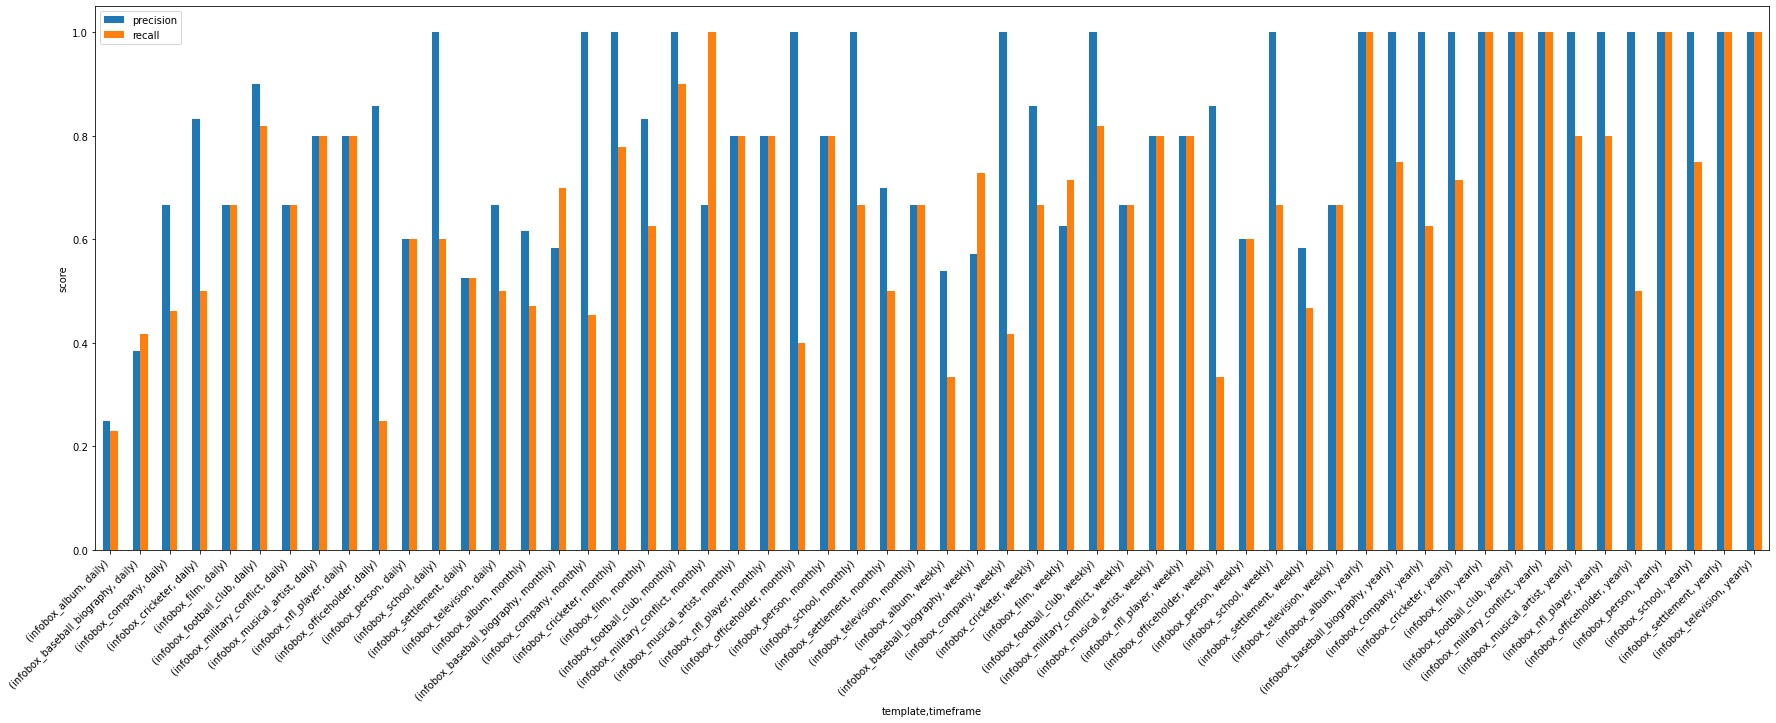

In [146]:
test_df.plot(kind="bar", figsize=(30, 10))
plt.ylabel("score")
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
#framework.data = pd.read_csv('../../data/popular_data_with_features3.csv')[:10000]

In [ ]:
#framework.data["value_valid_from"] = pd.to_datetime(framework.data["timestamp"]).dt.tz_localize(None)

In [ ]:
# framework.data.drop(columns=["page_title","template","timestamp"], inplace=True)